In [1]:
%run 1.0-adm-load-data-2012.ipynb

Populating the interactive namespace from numpy and matplotlib
Variables now available: df


In [2]:
from sklearn.decomposition import KernelPCA, PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler

In [3]:
scaler = Pipeline([
        ('imp', Imputer(strategy='mean')),
        ('scl', StandardScaler())
    ])
X = scaler.fit_transform(df)

## Kernel PCA with radial basis function as kernel

In [4]:
kpca = KernelPCA(kernel='rbf', fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

/Users/Arya/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Users/Arya/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Users/Arya/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Users/Arya/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Users/Arya/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Users/Arya/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Use

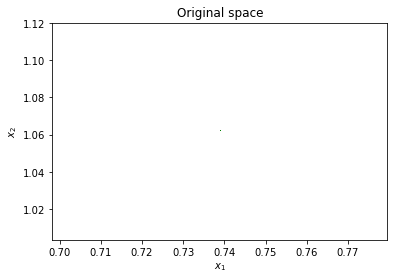

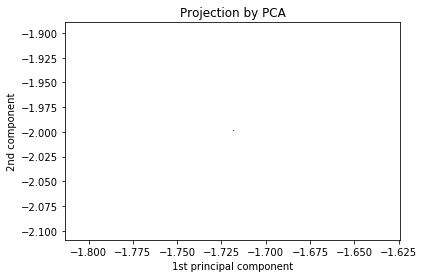

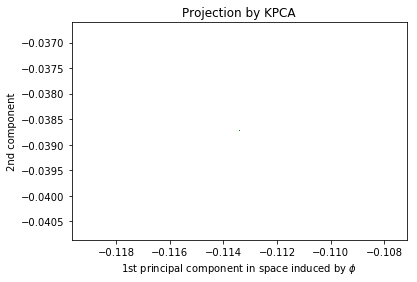

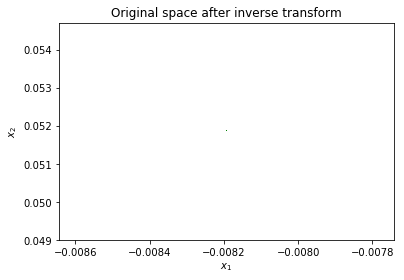

In [5]:
# Plot results.

plt.figure()
# plt.subplot(4, 1, 1, aspect='equal')
plt.title("Original space")
y = df_raw.pid_self# y = X_pca[:, 0] < 0
reds = y == 1
blues = y == -1
greens = y == 0

plt.plot(X[reds, 0], X[reds, 1], "r,")
plt.plot(X[blues, 0], X[blues, 1], "b,")
plt.plot(X[greens, 0], X[greens, 1], "g,")


plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
# X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# # projection on the first principal component (in the phi space)
# Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
# plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.figure() # plt.subplot(4, 1, 2, aspect='equal')
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "r,")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "b,")
plt.plot(X_pca[greens, 0], X_pca[greens, 1], "g,")

plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.figure() # plt.subplot(4, 1, 3, aspect='equal')
plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "r,")
plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "b,")
plt.plot(X_kpca[greens, 0], X_kpca[greens, 1], "g,")

plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.figure() # plt.subplot(4, 1, 4, aspect='equal')
plt.plot(X_back[reds, 0], X_back[reds, 1], "r,")
plt.plot(X_back[blues, 0], X_back[blues, 1], "b,")
plt.plot(X_back[greens, 0], X_back[greens, 1], "g,")

plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [6]:
X_kpca.shape

(5914, 5914)

## Kernel PCA with cubic polynomial as kernel

In [7]:
poly = KernelPCA(kernel='poly', fit_inverse_transform=True, gamma=10)
X_poly = poly.fit_transform(X)
X_pback = poly.inverse_transform(X_poly)

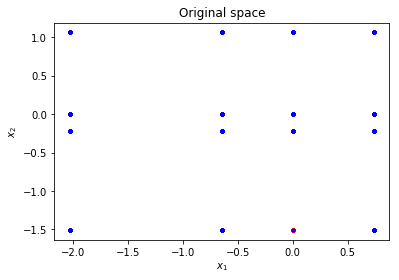

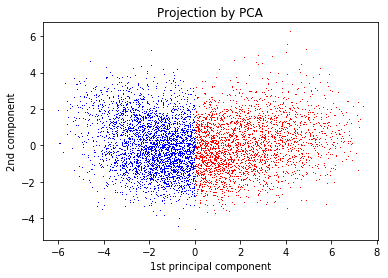

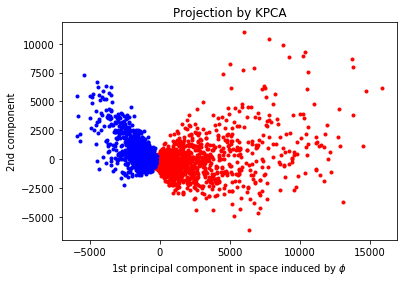

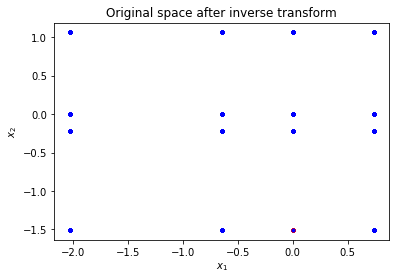

In [8]:
# Plot results.

plt.figure()
# plt.subplot(4, 1, 1, aspect='equal')
plt.title("Original space")
y = X_pca[:, 0] >= 0
reds = y == True
blues = y == False

plt.plot(X[reds, 0], X[reds, 1], "r.")
plt.plot(X[blues, 0], X[blues, 1], "b.")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
# X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# # projection on the first principal component (in the phi space)
# Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
# plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.figure() # plt.subplot(4, 1, 2, aspect='equal')
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "r,")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "b,")
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.figure() # plt.subplot(4, 1, 3, aspect='equal')
plt.plot(X_poly[reds, 0], X_poly[reds, 1], "r.")
plt.plot(X_poly[blues, 0], X_poly[blues, 1], "b.")
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.figure() # plt.subplot(4, 1, 4, aspect='equal')
plt.plot(X_pback[reds, 0], X_pback[reds, 1], "r.")
plt.plot(X_pback[blues, 0], X_pback[blues, 1], "b.")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [9]:
poly = KernelPCA(kernel='poly', fit_inverse_transform=True)
X_poly = poly.fit_transform(X)
X_pback = poly.inverse_transform(X_poly)

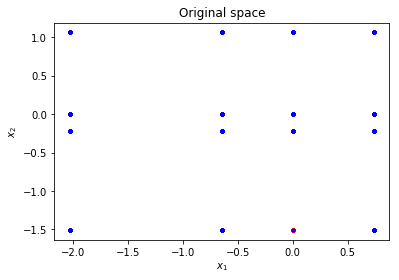

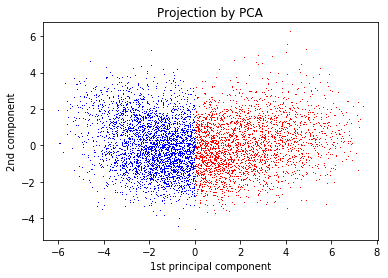

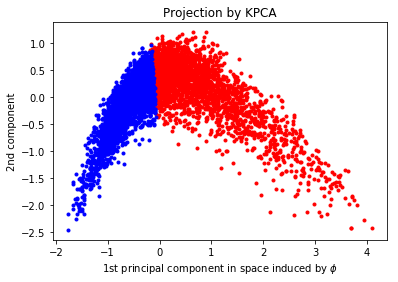

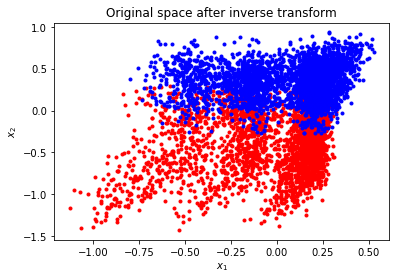

In [10]:
# Plot results.

plt.figure()
# plt.subplot(4, 1, 1, aspect='equal')
plt.title("Original space")
y = X_pca[:, 0] >= 0
reds = y == True
blues = y == False

plt.plot(X[reds, 0], X[reds, 1], "r.")
plt.plot(X[blues, 0], X[blues, 1], "b.")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
# X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# # projection on the first principal component (in the phi space)
# Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
# plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.figure() # plt.subplot(4, 1, 2, aspect='equal')
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "r,")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "b,")
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.figure() # plt.subplot(4, 1, 3, aspect='equal')
plt.plot(X_poly[reds, 0], X_poly[reds, 1], "r.")
plt.plot(X_poly[blues, 0], X_poly[blues, 1], "b.")
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.figure() # plt.subplot(4, 1, 4, aspect='equal')
plt.plot(X_pback[reds, 0], X_pback[reds, 1], "r.")
plt.plot(X_pback[blues, 0], X_pback[blues, 1], "b.")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

## $k$-Means clustering

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-1).fit(X)
pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)

,campfin_limcorp,pid_self,spsrvpr_ssself,defsppr_self,inspre_self,gun_control,guarpr_self,immig_policy,aidblack_self,envjob_self,...,dem_veteran,budget_rdefctax,budget_rdefmil,patriot_amident,milln_milltax,budget_rdef250k,fairjob_opin,immigpo_jobs,wiretap_warrant,postvote_presvtwho
0,0.026680,0.495975,0.444878,0.240505,0.437532,0.318505,0.400390,0.216181,0.376978,0.403827,...,0.090511,0.299743,0.239497,0.139868,0.273106,-0.251850,0.332419,0.124718,0.075167,0.541318
1,-0.044652,-0.830064,-0.744547,-0.402509,-0.732253,-0.533050,-0.670092,-0.361800,-0.630910,-0.675845,...,-0.151478,-0.501649,-0.400821,-0.234083,-0.457070,0.421496,-0.556337,-0.208727,-0.125800,-0.905950


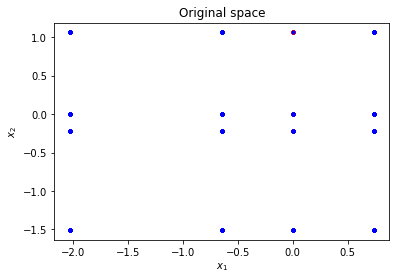

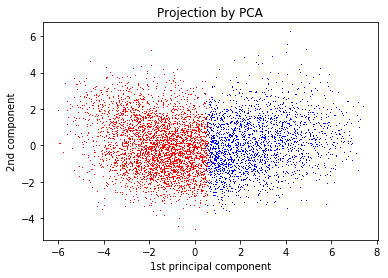

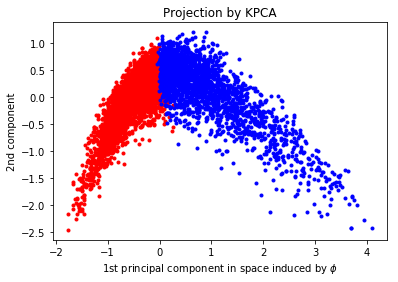

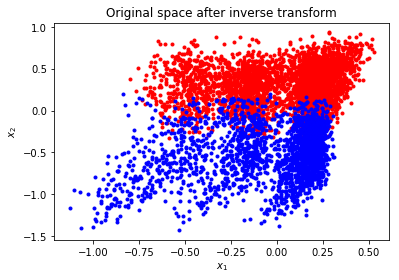

In [13]:
plt.figure()
# plt.subplot(4, 1, 1, aspect='equal')
plt.title("Original space")
y = X_pca[:, 0] >= 0
reds = kmeans.labels_ == 0
blues = kmeans.labels_ == 1

plt.plot(X[reds, 0], X[reds, 1], "r.")
plt.plot(X[blues, 0], X[blues, 1], "b.")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
# X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# # projection on the first principal component (in the phi space)
# Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
# plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.figure() # plt.subplot(4, 1, 2, aspect='equal')
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "r,")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "b,")
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.figure() # plt.subplot(4, 1, 3, aspect='equal')
plt.plot(X_poly[reds, 0], X_poly[reds, 1], "r.")
plt.plot(X_poly[blues, 0], X_poly[blues, 1], "b.")
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.figure() # plt.subplot(4, 1, 4, aspect='equal')
plt.plot(X_pback[reds, 0], X_pback[reds, 1], "r.")
plt.plot(X_pback[blues, 0], X_pback[blues, 1], "b.")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [14]:
df.pid_self.value_counts()

 1.0    2361
 0.0    1845
-1.0    1389
Name: pid_self, dtype: int64

In [15]:
df.postvote_presvtwho.value_counts()

 1.0    2274
-1.0    1539
 0.0     107
Name: postvote_presvtwho, dtype: int64

In [16]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()

import numpy as np

x, y, z = X_pca[:,:3].transpose()

xvector = pca.components_[0] 
yvector = pca.components_[1]
zvector = pca.components_[2]

triplot_data = pd.DataFrame(X, columns=df.columns)
tmp = pca.transform(triplot_data.values)
xs = tmp[:,0] 
ys = tmp[:,1]
zs = tmp[:,2]

annotations = []
for i in range(len(xvector)):
    txt = list(triplot_data.columns.values)[i]
    annotations.append(
            go.Scatter3d(
                x=[0, xvector[i]*max(xs)],
                y=[0, yvector[i]*max(ys)],
                z=[0, zvector[i]*max(zs)],
                mode='lines+text',
                text=['', txt],
                name=txt,
            ))





trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        opacity=0.4,
    )
)
annotations.append(trace1)

data = annotations
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    title="Triplot",
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')
